In [ ]:
import shap
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


df = pd.read_excel('data.xlsx')


selected_columns = df.columns[:7].tolist() + ['d33(pC/N)']
df = df[selected_columns]


X = df.drop(columns=["d33(pC/N)"])
y = df["d33(pC/N)"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


model = RandomForestRegressor(random_state=1)
model.fit(X_train, y_train)


explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)


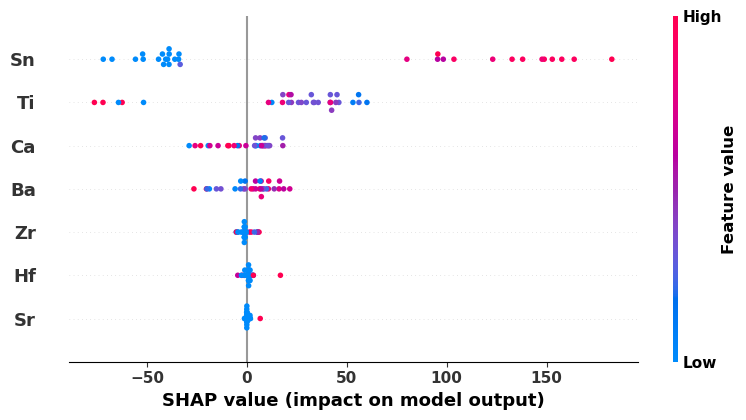

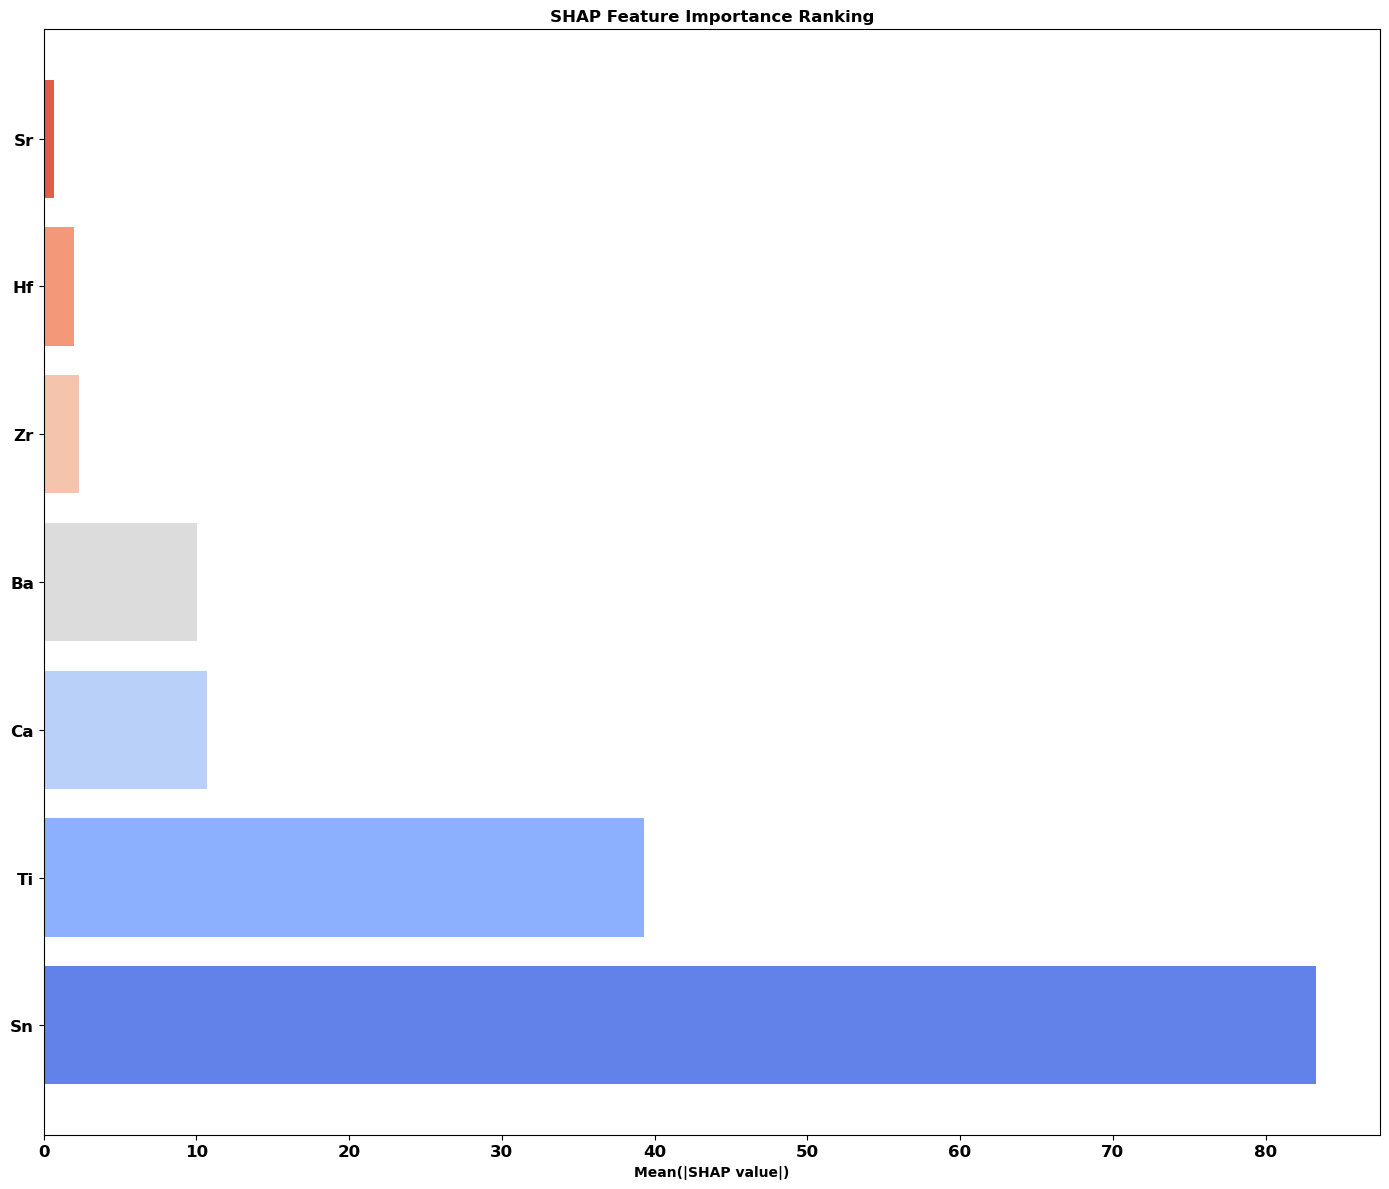

In [ ]:
import os
import matplotlib.pyplot as plt
import shap
import seaborn as sns
import numpy as np
import pandas as pd


plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

save_dir = "shap"
os.makedirs(save_dir, exist_ok=True)

plt.figure(figsize=(14, 12))
shap.summary_plot(shap_values, X_test, max_display=24, show=False)
plt.savefig(os.path.join(save_dir, "shap_summary.tif"), dpi=600, bbox_inches='tight', format='tiff')

if isinstance(shap_values, np.ndarray):
    mean_shap = np.abs(shap_values).mean(axis=0)
else:
    mean_shap = np.abs(shap_values.values).mean(axis=0)

feature_names = X_test.columns
sorted_idx = np.argsort(mean_shap)[::-1][:24]
sorted_features = feature_names[sorted_idx]
sorted_importance = mean_shap[sorted_idx]

df_importance = pd.DataFrame({
    'Feature': sorted_features,
    'Mean |SHAP value|': sorted_importance
})
df_importance.to_excel(os.path.join(save_dir, "shap_feature_importance.xlsx"), index=False)

colors = sns.color_palette("coolwarm", len(sorted_features))[::-1]

plt.figure(figsize=(14, 12))
bars = plt.barh(range(len(sorted_features)), sorted_importance[::-1], color=colors)
plt.yticks(range(len(sorted_features)), sorted_features[::-1])
plt.xlabel("Mean(|SHAP value|)")
plt.title("SHAP Feature Importance Ranking")
plt.gca().invert_yaxis()

plt.tight_layout()
plt.savefig(os.path.join(save_dir, "shap_feature_importance.tif"), format="tiff", dpi=600)
plt.show()
